# **Library**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# **Import Data**

In [2]:
from google.colab import files
files.upload()

Saving bmw.csv to bmw.csv


{'bmw.csv': b'model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize\r\n 5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0\r\n 6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0\r\n 5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0\r\n 1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5\r\n 7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0\r\n 5 Series,2016,14900,Automatic,35309,Diesel,125,60.1,2.0\r\n 5 Series,2017,16000,Automatic,38538,Diesel,125,60.1,2.0\r\n 2 Series,2018,16250,Manual,10401,Petrol,145,52.3,1.5\r\n 4 Series,2017,14250,Manual,42668,Diesel,30,62.8,2.0\r\n 5 Series,2016,14250,Automatic,36099,Diesel,20,68.9,2.0\r\n X3,2017,15500,Manual,74907,Diesel,145,52.3,2.0\r\n 1 Series,2017,11800,Manual,29840,Diesel,20,68.9,2.0\r\n X3,2016,15500,Automatic,77823,Diesel,125,54.3,2.0\r\n 2 Series,2015,10500,Manual,31469,Diesel,20,68.9,2.0\r\n X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0\r\n 3 Series,2017,16500,Manual,16570,Diesel,125,58.9,2.0\

In [3]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# **Check & Cleansing Data**

In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

*There's no Null/ NaN values, so the table remains unchanged*

# **Unsupervised Learning : Clustering - KMeans**

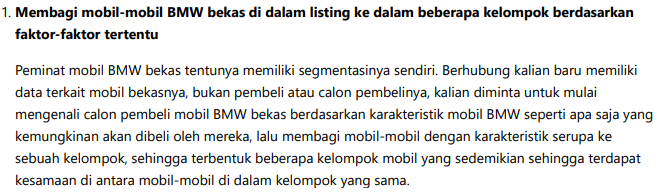

In [6]:
from sklearn import preprocessing

In [11]:
df2 = df[['year','price','mileage','tax','mpg','engineSize']]
df2.head()

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0


In [12]:
minmax = preprocessing.MinMaxScaler().fit_transform(df2)

In [19]:
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:6])
df3.head()

,year,price,mileage,tax,mpg,engineSize
0,0.750000,0.081796,0.313399,0.215517,0.111971,0.303030
1,0.916667,0.211033,0.069281,0.250000,0.080163,0.303030
2,0.833333,0.121057,0.293427,0.275862,0.098646,0.454545
3,0.875000,0.094474,0.124650,0.250000,0.143778,0.227273
4,0.750000,0.108788,0.184828,0.275862,0.096497,0.454545


In [28]:
scr = []
for i in range(1,20):
  score = KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  scr.append(score)

-591.6312151482492
-391.7003018939732
-319.4567482552118
-262.7631260432063
-225.0643101000394
-190.8042939524886
-162.3399660462165
-139.9762781890852
-127.1397126170994
-115.50503659522884
-106.9565480730816
-100.7426374292875
-95.09594495151565
-90.90092915579876
-85.42800534448338
-81.85031412989233
-78.89328089897529
-77.10831751802024
-73.01769726742747


In [29]:
scr

[-591.6312151482492,
 -391.7003018939732,
 -319.4567482552118,
 -262.7631260432063,
 -225.0643101000394,
 -190.8042939524886,
 -162.3399660462165,
 -139.9762781890852,
 -127.1397126170994,
 -115.50503659522884,
 -106.9565480730816,
 -100.7426374292875,
 -95.09594495151565,
 -90.90092915579876,
 -85.42800534448338,
 -81.85031412989233,
 -78.89328089897529,
 -77.10831751802024,
 -73.01769726742747]

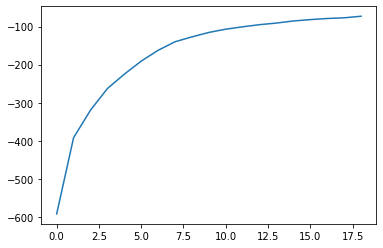

In [30]:
plt.plot(scr)

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [32]:
df3['cluster'] = kmeans.labels_

In [33]:
df3.head()

,year,price,mileage,tax,mpg,engineSize,cluster
0,0.750000,0.081796,0.313399,0.215517,0.111971,0.303030,2
1,0.916667,0.211033,0.069281,0.250000,0.080163,0.303030,3
2,0.833333,0.121057,0.293427,0.275862,0.098646,0.454545,4
3,0.875000,0.094474,0.124650,0.250000,0.143778,0.227273,4
4,0.750000,0.108788,0.184828,0.275862,0.096497,0.454545,4


(array([1243.,    0., 1807.,    0.,    0.,  835.,    0., 3871.,    0.,
        3025.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

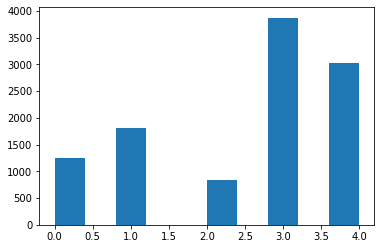

In [40]:
plt.hist(df3['cluster'])

### **Dapat disimpulkan bahwa cluster 3 merupakan segmentasi yang paling banyak jumlahnya sebagai calon pembeli mobil BMW bekas**

# **2. Supervised Learning - Linear Regression**

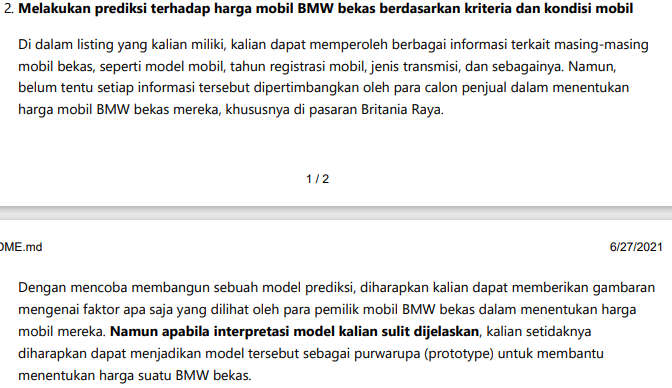

In [41]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# **Using Lasso Method**

In [44]:
X = df[['year','price','mileage','tax','mpg','engineSize']].values

print("Dimensions of X before reshaping: {}".format(X.shape))

X_reshaped = X.reshape(-1, 1)

print("Dimensions of X after reshaping: ", X_reshaped.shape)

Dimensions of X before reshaping: (10781, 6)
Dimensions of X after reshaping:  (64686, 1)


In [45]:
X

array([[2.0140e+03, 1.1200e+04, 6.7068e+04, 1.2500e+02, 5.7600e+01,
        2.0000e+00],
       [2.0180e+03, 2.7000e+04, 1.4827e+04, 1.4500e+02, 4.2800e+01,
        2.0000e+00],
       [2.0160e+03, 1.6000e+04, 6.2794e+04, 1.6000e+02, 5.1400e+01,
        3.0000e+00],
       ...,
       [2.0170e+03, 1.3100e+04, 2.5468e+04, 2.0000e+02, 4.2800e+01,
        2.0000e+00],
       [2.0140e+03, 9.9300e+03, 4.5000e+04, 3.0000e+01, 6.4200e+01,
        2.0000e+00],
       [2.0170e+03, 1.5981e+04, 5.9432e+04, 1.2500e+02, 5.7600e+01,
        2.0000e+00]])

In [50]:
y = df['model'].values

print("Dimensions of y before reshaping: ", y.shape)

y_reshaped = y.reshape(-1,1)

print("Dimensions of y after reshaping: ", y_reshaped.shape)

Dimensions of y before reshaping:  (10781,)
Dimensions of y after reshaping:  (10781, 1)


In [47]:
from sklearn.linear_model import Lasso

In [48]:
lasso = Lasso(alpha=0.4,normalize = True)

In [51]:
lasso.fit(X,y)

ValueError: ignored